<a href="https://www.kaggle.com/code/saadatkhalid/fashion-mnist-classification-with-neural-network?scriptVersionId=142090221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Author Profile:

## About ME:
Hi there, I'm Saadat Khalid Awan 👋

`Aspiring Data Scientist | Problem Solver | Lifelong Learner`

I'm a software engineer with a keen interest in data science. I hold a BS degree in Software Engineering and am currently learning about the field of data science.

## Project Title: Fashion MNIST - Classification with Neural Networks
### Submission Date: September 6, 2023

## 🌐 Let's Connect:
[![Facebook](https://img.shields.io/badge/Facebook-%231877F2.svg?logo=Facebook&logoColor=white)](https://facebook.com/Saadat.Khalid.Awan) [![Instagram](https://img.shields.io/badge/Instagram-%23E4405F.svg?logo=Instagram&logoColor=white)](https://instagram.com/saadii_awan66) [![LinkedIn](https://img.shields.io/badge/LinkedIn-%230077B5.svg?logo=linkedin&logoColor=white)](https://linkedin.com/in/saadatawan) [![Medium](https://img.shields.io/badge/Medium-12100E?logo=medium&logoColor=white)](https://medium.com/@@me.saadat) [![Pinterest](https://img.shields.io/badge/Pinterest-%23E60023.svg?logo=Pinterest&logoColor=white)](https://pinterest.com/its_saadatkhalid) [![Quora](https://img.shields.io/badge/Quora-%23B92B27.svg?logo=Quora&logoColor=white)](https://quora.com/profile/Saadat-Khalid-Awan) [![TikTok](https://img.shields.io/badge/TikTok-%23000000.svg?logo=TikTok&logoColor=white)](https://tiktok.com/@@saadat.awan) [![Twitter](https://img.shields.io/badge/Twitter-%231DA1F2.svg?logo=Twitter&logoColor=white)](https://twitter.com/saadat_96) [![YouTube](https://img.shields.io/badge/YouTube-%23FF0000.svg?logo=YouTube&logoColor=white)](https://youtube.com/@saadatkhalidawan) [![Github](https://img.shields.io/badge/Github-%23FF0000.svg?logo=Github&logoColor=Black)](https://github.com/Saadat-Khalid/)

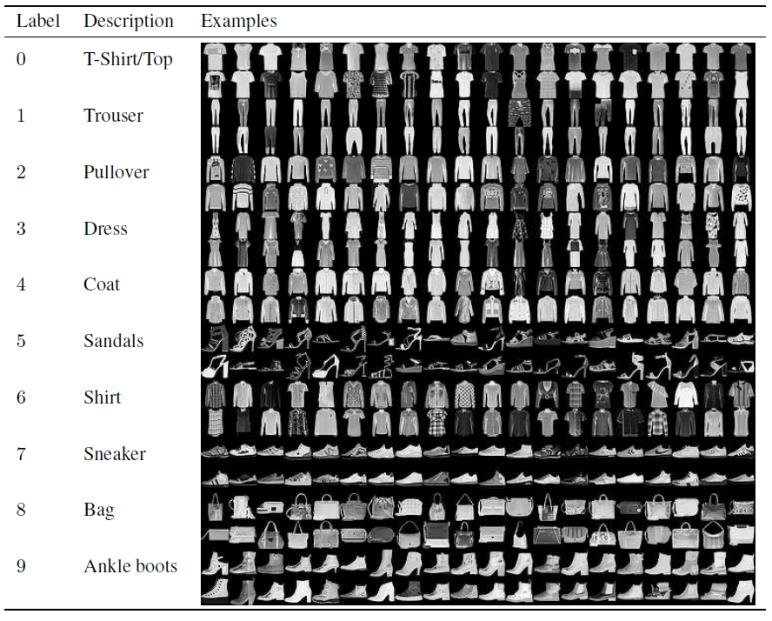

# Introduction

## Fashion-MNIST 👗

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are:

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot

Fashion-MNIST is a popular dataset for machine learning and computer vision tasks. It is a good alternative to the MNIST dataset, which contains handwritten digits. Fashion-MNIST is also a good dataset for beginners who are learning about machine learning and computer vision.

## Dataset Overview 📊
* Source: Fashion MNIST 👗
* Collection Date: 2017 🗓️

The Fashion-MNIST dataset can be downloaded from [Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist).


# Libraries Utilized 📚
1. **Pandas:** Data processing and manipulation.

2. **Numpy:** Numerical operations and computations.

3. **TensorFlow:** Open-source machine learning framework.

4. **Keras: **High-level neural networks API.

5. **Matplotlib:** Visualization and plotting.

6. **Scikit-learn:** Machine learning tools and metrics.

7. **TensorFlow Utilities:** Fetching device-specific details.

# 1. Importing Libraries

In [1]:
# Data Manipulation and Analysis Libraries
import numpy as np   # For numerical operations
import pandas as pd  # For data manipulation

# Neural Network Libraries
import tensorflow as tf                  # TensorFlow framework
from tensorflow.keras import layers, models
import keras                             # High-level neural network API
from keras.datasets import fashion_mnist # Fashion MNIST dataset
from keras.utils import to_categorical   # Utility to convert labels to one-hot encoding
from keras.models import Sequential      # Linear stack of neural network layers
from keras.layers.core import Dense, Flatten             # Dense layers and flattening tool
from keras.layers.convolutional import Conv2D, MaxPooling2D  # Convolutional and pooling layers

# Visualization Libraries
import matplotlib.pyplot as plt  # For plotting and visualization

# Model Evaluation Libraries
from sklearn.metrics import accuracy_score  # Accuracy metric for model evaluation

# TensorFlow Utility for Device Information
from tensorflow.python.client import device_lib  # Fetch device-specific details

# 2. Load the Dataset

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## 2.1 Checking the dataset shape

In [3]:
# Check the dataset shape
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


# 3. Data Exploration

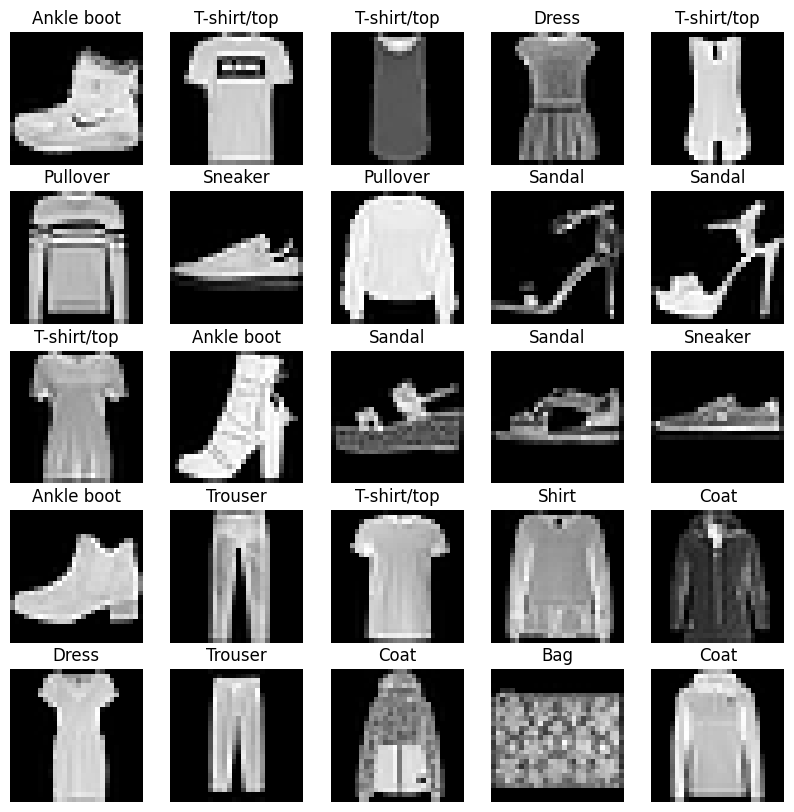

In [4]:
# Define class names for reference (Fashion MNIST class names)
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

# 4. Data Preprocessing
* Data preprocessing typically involves tasks like normalizing the data and preparing it in a format suitable for training.
* I'll normalize the pixel values to be in the range [0, 1] and flatten the image arrays.

In [5]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the image arrays
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# 5. Build a CNN Neural Network Model
* Convolutional Neural Network (CNN) model for the Famous Fashion MNIST dataset. CNNs are well-suited for image classification tasks.

In [6]:
# Define the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 output classes
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

I define a CNN model with two convolutional layers, max-pooling layers for downsampling, a flatten layer to transition from convolutional to fully connected layers, and finally, two dense layers for classification. Note that we've reshaped the input data to have a shape of (28, 28, 1) to indicate grayscale images.

# 6. Model Training

In [9]:
# Expand the dimensions of the input data to match the CNN input shape
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Train the CNN model
history = model.fit(x_train_cnn, y_train, epochs=10, validation_split=0.2)

# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
1500/1500 [==============================] - 30s 19ms/step - loss: 0.4880 - accuracy: 0.8232 - val_loss: 0.3650 - val_accuracy: 0.8692
Epoch 2/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3244 - accuracy: 0.8826 - val_loss: 0.3043 - val_accuracy: 0.8900
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2787 - accuracy: 0.8975 - val_loss: 0.2952 - val_accuracy: 0.8899
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2437 - accuracy: 0.9104 - val_loss: 0.2667 - val_accuracy: 0.9028
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2192 - accuracy: 0.9195 - val_loss: 0.2610 - val_accuracy: 0.9080
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1962 - accuracy: 0.9264 - val_loss: 0.2593 - val_accuracy: 0.9072
Epoch 7/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1777 - accuracy: 0.9343 - val_loss: 0.2485 -

# 7. Visualize Model Performance

You can visualize the training and validation loss and accuracy over the epochs to assess how well your CNN model is performing

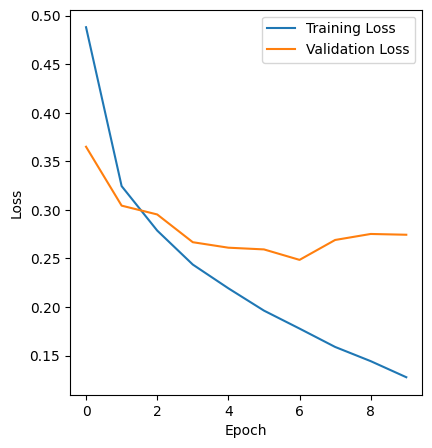

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


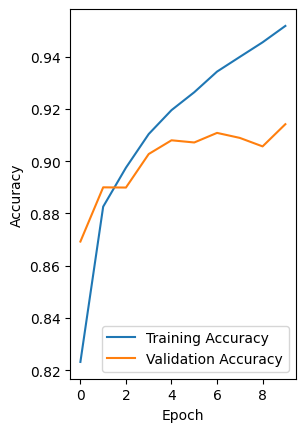

In [11]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 8. Make Predictions

 Let's make predictions on new data using the trained CNN model. You can use this to classify images you haven't seen before

1/1 [==============================] - 0s 114ms/step


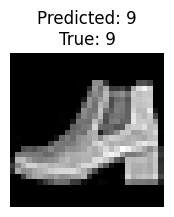

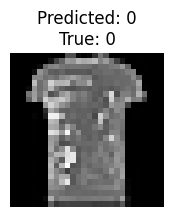

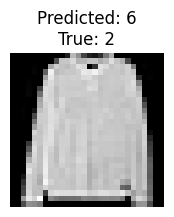

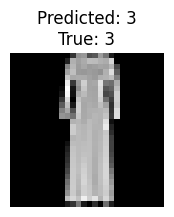

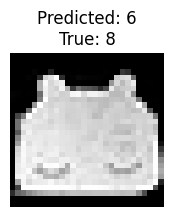

In [12]:
# Randomly select a few test samples
sample_indices = np.random.choice(len(x_test_cnn), size=5, replace=False)
sample_images = x_test_cnn[sample_indices]

# Make predictions
predictions = model.predict(sample_images)

# Display the predictions and true labels
for i in range(len(sample_indices)):
    plt.figure(figsize=(2, 2))
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {y_test[sample_indices[i]]}")
    plt.axis('off')
    plt.show()

# 9. Save the Trained Model

In [13]:
# Save the trained model
model.save('fashion_mnist_cnn_model.h5')
